# 0. Importar Librerías

In [1]:
#Librerías de interés.
import pandas as pd                                   #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt                       #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
from matplotlib.colors import LinearSegmentedColormap #Útil para definir un mapa de color por segmentos lineales. 
import numpy as np                                    #Importamos la librería numpy para manipular arreglos. 
import seaborn as sns

#from google.colab import files                        #Esta librería nos sirve para cargar archivos desde el disco duro.

#!pip install sklearn --upgrade                       #En caso que requiera actualizar sklearn. 
from sklearn.model_selection import train_test_split  #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler        #Útil para escalar los atributos de entrada.
import sklearn.datasets as dt                         #Útil para crear datasets sintéticos para hacer pruebas. 
from sklearn.linear_model import LogisticRegression   #Modelo de regresión logística para clasificación. 
from sklearn import metrics                           #Permite calcular algunas métricas de desempeño.

from copy import deepcopy                             #Permite hacer copias profundas. 

# Función sigmoide o logit.

\begin{equation}
{y_{pred}}\left( {{z^{\left( j \right)}}} \right) = \sigma \left( {{z^{\left( j \right)}}} \right) = \frac{1}{{1 + {e^{ - {z^{\left( j \right)}}}}}} = {\left( {1 + {e^{ - {z^{\left( j \right)}}}}} \right)^{ - 1}}
\end{equation}

In [2]:
def sigmoide(z):
  sigma = 1.0/(1+np.exp(-z))
  return sigma

In [3]:
#Creación de datos de entrada y salida para la función sigmoide
z     = np.arange(-10,10,0.1).reshape((-1,1))  #Vector columna con valores z.
sigma = sigmoide(z)
print(z)

[[-1.00000000e+01]
 [-9.90000000e+00]
 [-9.80000000e+00]
 [-9.70000000e+00]
 [-9.60000000e+00]
 [-9.50000000e+00]
 [-9.40000000e+00]
 [-9.30000000e+00]
 [-9.20000000e+00]
 [-9.10000000e+00]
 [-9.00000000e+00]
 [-8.90000000e+00]
 [-8.80000000e+00]
 [-8.70000000e+00]
 [-8.60000000e+00]
 [-8.50000000e+00]
 [-8.40000000e+00]
 [-8.30000000e+00]
 [-8.20000000e+00]
 [-8.10000000e+00]
 [-8.00000000e+00]
 [-7.90000000e+00]
 [-7.80000000e+00]
 [-7.70000000e+00]
 [-7.60000000e+00]
 [-7.50000000e+00]
 [-7.40000000e+00]
 [-7.30000000e+00]
 [-7.20000000e+00]
 [-7.10000000e+00]
 [-7.00000000e+00]
 [-6.90000000e+00]
 [-6.80000000e+00]
 [-6.70000000e+00]
 [-6.60000000e+00]
 [-6.50000000e+00]
 [-6.40000000e+00]
 [-6.30000000e+00]
 [-6.20000000e+00]
 [-6.10000000e+00]
 [-6.00000000e+00]
 [-5.90000000e+00]
 [-5.80000000e+00]
 [-5.70000000e+00]
 [-5.60000000e+00]
 [-5.50000000e+00]
 [-5.40000000e+00]
 [-5.30000000e+00]
 [-5.20000000e+00]
 [-5.10000000e+00]
 [-5.00000000e+00]
 [-4.90000000e+00]
 [-4.8000000

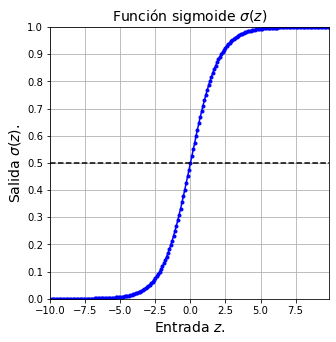

In [4]:
#Gráfica de la función sigmoide.
figsize=(5,5)
plt.figure(figsize=figsize)
plt.plot(z,sigma,color='blue',marker='.')
plt.plot(z,0.5*np.ones(z.shape),'k--')
plt.title('Función sigmoide $\sigma(z)$',fontsize=14)
plt.xlabel('Entrada $z$.',fontsize=14)
plt.ylabel('Salida $\sigma(z)$.',fontsize=14)
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.show()

#Observe que cuando z es igual a 0, la función sigmoide arroja 0.5.
#Note también que la función sigmoide siempre está en el rango entre 0 y 1.

# 1. Cargar Datos

In [5]:
df = pd.read_csv('..\Datasets\diabetes.csv')

# 2. Análisis Exploratorio de los Datos

## 2.1 Información Básica

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Conteo de objetos por clase:
0    500
1    268
Name: Outcome, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



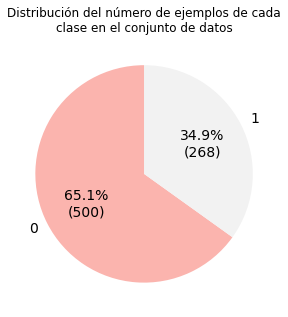

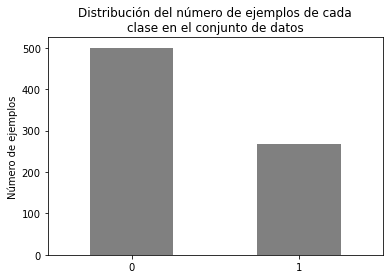

In [9]:
#Econtremos cómo están repartidas las categorías en el conjunto de datos. 
conteo_de_ejemplos_por_clase = df['Outcome'].value_counts()
print('Conteo de objetos por clase:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_clase),'\n')

#Revisemos esta información de forma gráfica.
#-------------------------------------------------------------------------------
#Opción 1: usemos un gráfico tipo pastel desde pandas. 
#-------------------------------------------------------------------------------
conteo_de_ejemplos_por_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('') #Esto es para evitar un texto en el eje y que diría Species.
plt.show()

#-------------------------------------------------------------------------------
#Opción 2: usemos un gráfico de barras. 
#-------------------------------------------------------------------------------
ax = conteo_de_ejemplos_por_clase.plot.bar(x='Outcome', rot=0, color='gray')
plt.title(titulo) 
plt.ylabel('Número de ejemplos')
plt.show()

## 2.2 Tratar inconsistencias: ceros que no corresponden

In [10]:
df_clean = deepcopy(df)
df_clean.shape

(768, 9)

In [11]:
#Nombre de los posibles atributos de entrada:
# 0   Pregnancies (tiene ceros): es normal que hayan valores cero en este atributo.
# 1   Glucose (tiene ceros) : NO es normal que hayan valores cero en este atributo.
# 2   BloodPressure (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 3   SkinThickness (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 4   Insulin (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 5   BMI (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 6   DiabetesPedigreeFunction (NO tiene ceros)
# 7   Age (NO tiene ceros)

n_rows, n_cols = df_clean.shape

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    count = (df_clean[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    print("\n")

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


Atributo: Glucose
Número de valores 0:  5
Porcentaje de valores cero: 0.65


Atributo: BloodPressure
Número de valores 0:  35
Porcentaje de valores cero: 4.56


Atributo: SkinThickness
Número de valores 0:  227
Porcentaje de valores cero: 29.56


Atributo: Insulin
Número de valores 0:  374
Porcentaje de valores cero: 48.70


Atributo: BMI
Número de valores 0:  11
Porcentaje de valores cero: 1.43


Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00




In [12]:
sns.set_theme(style="whitegrid")
n_rows, n_cols = df.shape
df_1 = df_clean.loc[df_clean['Outcome'] == 1]
df_0 = df_clean.loc[df_clean['Outcome'] == 0]

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    print("Mediana de atributo " + atributo_de_interes + " para Diabético: %.2f" % np.median(df_1[atributo_de_interes]))
    print("Mediana de atributo " + atributo_de_interes + " para NO Diabético: %.2f" % np.median(df_0[atributo_de_interes]))
    print('\n')

Mediana de atributo Pregnancies para Diabético: 4.00
Mediana de atributo Pregnancies para NO Diabético: 2.00


Mediana de atributo Glucose para Diabético: 140.00
Mediana de atributo Glucose para NO Diabético: 107.00


Mediana de atributo BloodPressure para Diabético: 74.00
Mediana de atributo BloodPressure para NO Diabético: 70.00


Mediana de atributo SkinThickness para Diabético: 27.00
Mediana de atributo SkinThickness para NO Diabético: 21.00


Mediana de atributo Insulin para Diabético: 0.00
Mediana de atributo Insulin para NO Diabético: 39.00


Mediana de atributo BMI para Diabético: 34.25
Mediana de atributo BMI para NO Diabético: 30.05


Mediana de atributo DiabetesPedigreeFunction para Diabético: 0.45
Mediana de atributo DiabetesPedigreeFunction para NO Diabético: 0.34


Mediana de atributo Age para Diabético: 36.00
Mediana de atributo Age para NO Diabético: 27.00




In [13]:
predictores = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df_1 = df_clean.loc[df_clean['Outcome'] == 1]
df_0 = df_clean.loc[df_clean['Outcome'] == 0]

for atributo in predictores:
    df_1 = df_1.replace({atributo:0}, np.median(df_1[atributo]))
    df_0 = df_0.replace({atributo:0}, np.median(df_0[atributo]))

dataframe = [df_1, df_0]
df_clean = pd.concat(dataframe)

In [14]:
n_rows, n_cols = df_clean.shape

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    count = (df_clean[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    print("\n")

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


Atributo: Glucose
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: BloodPressure
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: SkinThickness
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Insulin
Número de valores 0:  138
Porcentaje de valores cero: 17.97


Atributo: BMI
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00




## 2.3 Correlaciones

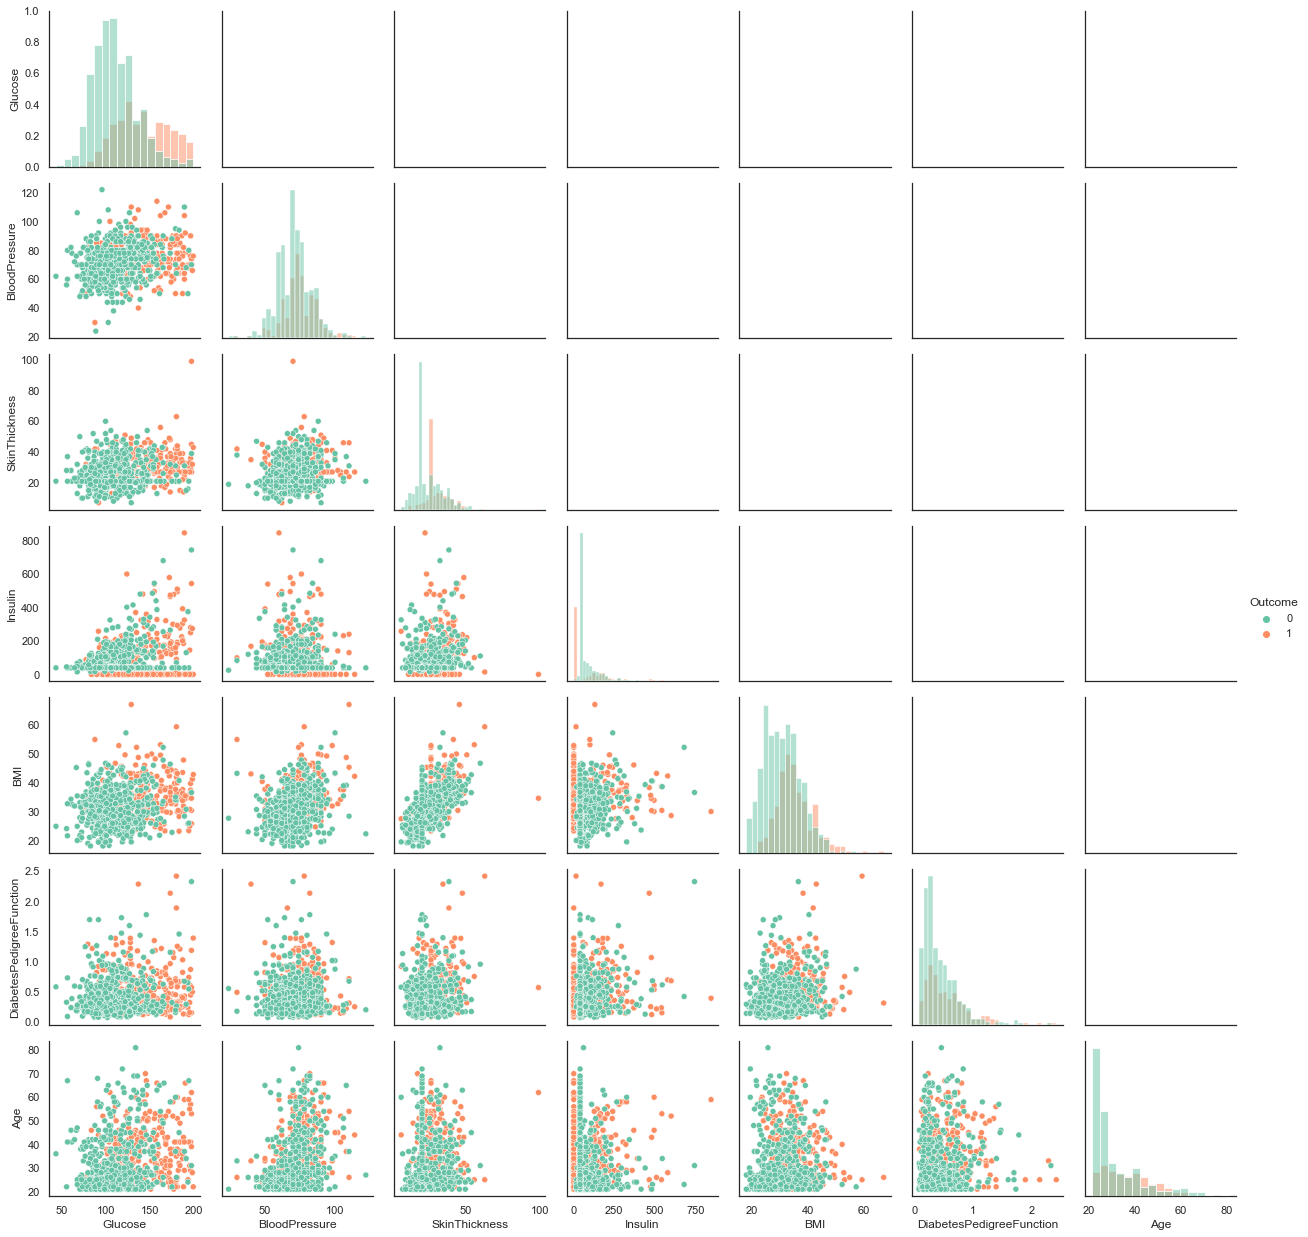

In [15]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean.iloc[:,1:],hue='Outcome',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

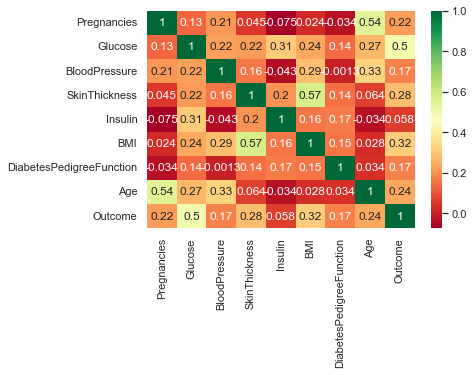

In [16]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

# 3. Modelo

**Vamos a utilizar el modelo para clasificación Regresión Logística (Logistic Regression).**

## 3.1 Construcción del modelo

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression()

## 3.2 Baseline

In [18]:
count_p = (df_clean["Outcome"] == 1).sum()
print("Número de Observaciones para Diabéticos: ", count_p)

count_n = (df_clean["Outcome"] == 0).sum()
print("Número de Observaciones para NO Diabéticos: ", count_n)

print("Línea Base: %.2f" % (100*count_n/(count_p+count_n)))

Número de Observaciones para Diabéticos:  268
Número de Observaciones para NO Diabéticos:  500
Línea Base: 65.10


## 3.3 Selección de Predictores

In [50]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='Outcome' 

#Nombre de los posibles atributos de entrada:
# 'Pregnancies'
# 'Glucose'
# 'BloodPressure'
# 'SkinThickness'
# 'Insulin'
# 'BMI'
# 'DiabetesPedigreeFunction'
# 'Age'

nombre_de_las_variables_de_entrada = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

df_y = df_clean[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(df_y)

df_x = deepcopy(df_clean[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(type(df_x))
print(df_x)

Dataframe de salida:
0      1
2      1
4      1
6      1
8      1
      ..
762    0
763    0
764    0
765    0
767    0
Name: Outcome, Length: 768, dtype: int64

Dataframe de entrada:
<class 'pandas.core.frame.DataFrame'>
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64             27        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62             21       39  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27       39  36.8   
765            5      121             

## 3.4 Protocolo de Evaluación: Train/Val/Test

In [20]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo o validación, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42
4#Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    #Una fracción de los datos de entrada. 
                                                              df_y_rest,                                    #Una fracción de los datos de salida.        
                                                              test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_desarrollo*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

conteo_de_ejemplos_por_clase = df_y_train.value_counts()
print('Conteo de objetos por clase en el conjunto de entrenamiento:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de entrenamiento es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_val.value_counts()
print('Conteo de objetos por clase en el conjunto de validación:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de validación es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_test.value_counts()
print('Conteo de objetos por clase en el conjunto de prueba:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de prueba es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 171 to 334
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo

## 3.5 Entrenamiento

In [51]:
log_reg_1.fit(df_x_train,df_y_train)

C:\Users\Breyner\anaconda3\envs\ia_1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_x_train_norm = scaler.fit_transform(df_x_train)
df_x_val_norm = scaler.transform(df_x_val)
df_x_test_norm = scaler.transform(df_x_test)

In [53]:
log_reg_1.fit(df_x_train_norm,df_y_train)

LogisticRegression()

In [54]:
log_reg_1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
print('w0 =', log_reg_1.intercept_)
print('wn =', log_reg_1.coef_)

w0 = [-4.45865654]
wn = [[ 1.08692054  3.92278131 -0.56927475  1.77428277 -1.04859264  2.01149201
   1.08697523  1.02691958]]


# 4. Evaluación

In [26]:
# predict probabilities
y_prob_val = log_reg_1.predict_proba(df_x_val_norm)

In [27]:
y_prob_val.shape

(154, 2)

In [28]:
print(y_prob_val)

[[0.58689017 0.41310983]
 [0.91276403 0.08723597]
 [0.6552761  0.3447239 ]
 [0.40057051 0.59942949]
 [0.54187411 0.45812589]
 [0.88828569 0.11171431]
 [0.94406127 0.05593873]
 [0.85298452 0.14701548]
 [0.19979385 0.80020615]
 [0.33099164 0.66900836]
 [0.27440657 0.72559343]
 [0.53988485 0.46011515]
 [0.86487999 0.13512001]
 [0.61339699 0.38660301]
 [0.71802809 0.28197191]
 [0.01682493 0.98317507]
 [0.89270439 0.10729561]
 [0.86490758 0.13509242]
 [0.5889236  0.4110764 ]
 [0.21782149 0.78217851]
 [0.62547147 0.37452853]
 [0.56992781 0.43007219]
 [0.58361424 0.41638576]
 [0.84701049 0.15298951]
 [0.70653668 0.29346332]
 [0.85839053 0.14160947]
 [0.53178932 0.46821068]
 [0.90388582 0.09611418]
 [0.63294931 0.36705069]
 [0.96161386 0.03838614]
 [0.62673566 0.37326434]
 [0.27541178 0.72458822]
 [0.76936913 0.23063087]
 [0.8851905  0.1148095 ]
 [0.58103491 0.41896509]
 [0.96205526 0.03794474]
 [0.22692696 0.77307304]
 [0.87855123 0.12144877]
 [0.91284005 0.08715995]
 [0.64972648 0.35027352]


In [29]:
# predict class
y_pred_val = log_reg_1.predict(df_x_val_norm)

In [30]:
y_pred_val.shape

(154,)

In [31]:
print(y_pred_val)

[0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0]


### Gráfica ROC (Receiver Operating Characteristic) y Métrica AUC(Area Under the Curve)

No Skill: ROC AUC=0.5000
Logistic: ROC AUC=0.8725


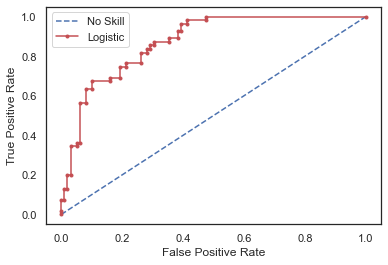

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob = [0 for _ in range(len(df_y_val))]

# keep probabilities for the positive outcome only
y_prob_val_c1 = y_prob_val[:, 1]

# calculate scores
ns_auc = roc_auc_score(df_y_val, ns_prob)
log_reg_auc = roc_auc_score(df_y_val, y_prob_val_c1)

# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('Logistic: ROC AUC=%.4f' % (log_reg_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(df_y_val, ns_prob)
log_reg_fpr, log_reg_tpr, ths = roc_curve(df_y_val, y_prob_val_c1)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'b', label='No Skill')
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', color = 'r', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [33]:
ths

array([1.98317507, 0.98317507, 0.83381037, 0.80020615, 0.77307304,
       0.76743339, 0.72458822, 0.69876238, 0.63476623, 0.61700426,
       0.6099653 , 0.59942949, 0.46011515, 0.44782703, 0.42634222,
       0.41896509, 0.41766908, 0.39800081, 0.38660301, 0.37410346,
       0.36912185, 0.36671753, 0.3631567 , 0.3447239 , 0.32296895,
       0.3150728 , 0.30318463, 0.29816484, 0.29767554, 0.29346332,
       0.28816499, 0.2772669 , 0.27121251, 0.26895876, 0.25115647,
       0.24410169, 0.23787556, 0.23063087, 0.23022316, 0.20009102,
       0.19698613, 0.03794474])

In [34]:
ths.shape

(42,)

In [35]:
th =ths[3]
print('Umbral: %.4f' % th)

Umbral: 0.8002


In [36]:
y_pred = np.zeros(len(y_prob_val_c1))
for i in range(len(y_prob_val_c1)):
    if (y_prob_val_c1[i] >= th):
        y_pred[i] = 1

In [37]:
cm = metrics.confusion_matrix(df_y_val,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

In [38]:
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)

TPR: 0.0727
FPR: 0.0101


In [39]:
roc = []

for j in range (len(ths)):
    y_pred = np.zeros(len(y_prob_val_c1))
    for i in range(len(y_prob_val_c1)):
        if (y_prob_val_c1[i] >= ths[j]):
            y_pred[i] = 1
    cm = metrics.confusion_matrix(df_y_val,y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    roc.append((TPR,FPR,ths[j]))    
        
roc = np.array(roc)    

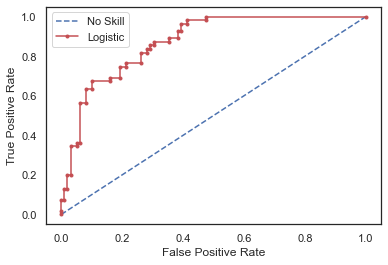

In [40]:
from sklearn.metrics import roc_curve

ns_prob = [0 for _ in range(len(df_y_val))]
ns_fpr, ns_tpr, _ = roc_curve(df_y_val, ns_prob)
plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'b', label='No Skill')
plt.plot(roc[:,1],roc[:,0],marker='.', color = 'r', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [41]:
distance_to_top_left_corner = []

for i in range(len(roc)):
    distance_to_top_left_corner.append( np.sqrt( ((roc[i,1]-0)**2)+((roc[i,0]-1)**2) ) )

index_of_best_threshold = distance_to_top_left_corner.index(min(distance_to_top_left_corner)) #Retorna el índice con la menor distancia
best_threshold          = ths[index_of_best_threshold]
print('El mejor umbral para el conjunto de validación es {:.4f}.'.format(best_threshold))

El mejor umbral para el conjunto de validación es 0.3632.


In [42]:
th = 0.3632
y_pred = np.zeros(len(y_prob_val_c1))
for i in range(len(y_prob_val_c1)):
    if (y_prob_val_c1[i] >= th):
        y_pred[i] = 1

cm = metrics.confusion_matrix(df_y_val,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)

TPR: 0.7455
FPR: 0.2121


In [43]:
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)

Accuracy: 0.7727


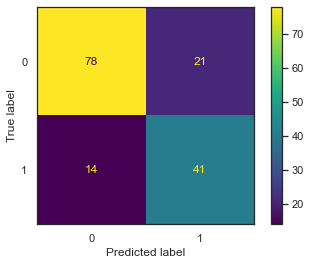

In [44]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Evaluar en el conjunto de Prueba

In [45]:
y_prob_test = log_reg_1.predict_proba(df_x_test_norm)

TPR: 0.7544
FPR: 0.2577
Accuracy: 0.7468


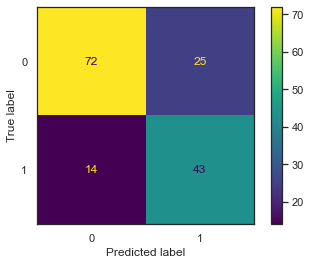

In [56]:
th = 0.3632
y_prob_test_c1 = y_prob_test[:, 1]
y_pred = np.zeros(len(y_prob_test_c1))
for i in range(len(y_prob_test_c1)):
    if (y_prob_test_c1[i] >= th):
        y_pred[i] = 1

cm = metrics.confusion_matrix(df_y_test,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score

log_reg_2 = LogisticRegression(solver='lbfgs',max_iter=500,class_weight='balanced')

scores_log_reg = cross_val_score(log_reg_2, df_x_rest, df_y_rest, cv=10, scoring='roc_auc_ovr')

print("AUC: %.4f" % scores_log_reg.mean())
print("Std of AUC: %.4f" % scores_log_reg.std())

AUC: 0.8520
Std of AUC: 0.0541


In [48]:
from sklearn.model_selection import cross_val_score

log_reg_2 = LogisticRegression(solver='lbfgs',max_iter=500,class_weight='None')

scores_log_reg = cross_val_score(log_reg_2, df_x_rest, df_y_rest, cv=10, scoring='roc_auc_ovr')

print("AUC: %.4f" % scores_log_reg.mean())
print("Std of AUC: %.4f" % scores_log_reg.std())

AUC: 0.8515
Std of AUC: 0.0542


In [49]:
scores_log_reg

array([0.9125    , 0.82346109, 0.89779326, 0.81765389, 0.75595238,
       0.77857143, 0.91547619, 0.87261905, 0.83928571, 0.90119048])